## Практическое задание к уроку № 2 по теме "Keras".

*Обучите нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами.  
Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?*

Основную часть кода скопируем с урока. Создание и обучение нейросети оформим  
в виде функции:

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

In [2]:
def normalize(x):
    return (x / 255) - 0.5

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
train_images = normalize(train_images)
test_images = normalize(test_images)
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
def train_nn(X_train, y_train, n1=64, n2=64, activation='relu', optimizer='adam'):

    set_seed(29)
    
    model = Sequential([
        Dense(n1, activation=activation, input_shape=(784,)),
        Dense(n2, activation=activation),
        Dense(10, activation='softmax'),
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(X_train, to_categorical(y_train),
              epochs=5,
              batch_size=32,
              verbose=0
    )
    
    return model

In [6]:
def eval_nn(model, X_test, y_test):
    return model.evaluate(X_test, to_categorical(y_test), verbose=0)[1]

Сначала оценим влияние количества нейронов в слоях:

In [7]:
from itertools import product
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

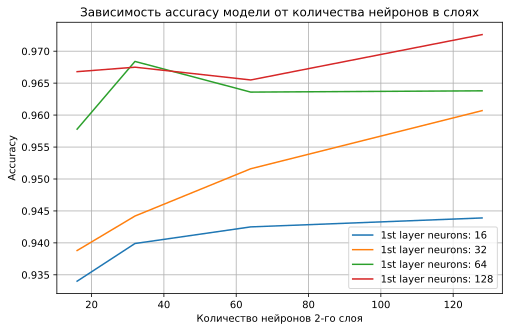

In [9]:
plt.figure(figsize=(8, 5))    
n1s = (16, 32, 64, 128)
n2s = (16, 32, 64, 128)
combinations = tuple(product(n1s, n2s))


for i in range(len(n1s)):
    metrics = []
    for n1, n2 in combinations[i*4:(i+1)*4]:
        metrics.append(eval_nn(train_nn(train_images, train_labels, n1=n1, n2=n2), test_images, test_labels))
    plt.plot(n2s, metrics, label=f'1st layer neurons: {n1}')

plt.title('Зависимость accuracy модели от количества нейронов в слоях')
plt.xlabel('Количество нейронов 2-го слоя')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.show()

На основании графика можно сделать вывод, что при увеличении количества  
нейронов первого слоя точность модели повышается. Интересно, что увеличение  
количества нейронов второго слоя иногда приводит к снижению метрики.  
Лучшей комбинацией количества нейронов оказалась (128, 128), но она, очевидно,  
самая медленная. Неплохой вариант (64, 32), который должен быть значительно быстрее,  
а в точности теряем менее 0,5%.

Теперь применим другую функцию активации, сигмоиду вместо ReLU:

In [10]:
print(f'Сигмоида:\t{eval_nn(train_nn(train_images, train_labels, n1=128, n2=128, activation="sigmoid"), test_images, test_labels)}\n'
      f'ReLU:\t\t{eval_nn(train_nn(train_images, train_labels, n1=128, n2=128), test_images, test_labels)}')

Сигмоида:	0.972599983215332
ReLU:		0.972599983215332


Влияние обеих функций на метрику одинаково.

Теперь воспользуемся другим методом оптимизации, возьмём Nadam.  
Оба варианта будем проверять на их параметрах по умолчанию:

In [11]:
print(f'Nadam:\t{eval_nn(train_nn(train_images, train_labels, n1=128, n2=128, optimizer="nadam"), test_images, test_labels)}\n'
      f'Adam:\t{eval_nn(train_nn(train_images, train_labels, n1=128, n2=128), test_images, test_labels)}')

Nadam:	0.9707000255584717
Adam:	0.972599983215332


Nadam оказывается чуть хуже применяемого нами Adam.

<ins>Вывод:</ins>  
Провели небольшое исследование влияния параметров при обучении  
нейронной сети на метрику Accuracy. Отметим, что выбранные нами  
параметры на уроке уже были достаточно неплохие. В качестве их  
улучшения можно было увеличить количество нейронов в слоях.  
Выбор остальных параметров и так показал максимальную метрику.  
Следует отметить, что мы не прибегали к тонкой настройке параметров  
и исследовали влияние только самых основных.